Exploring Polysemantic Universality with Embeddings
=====================================================

Check out the blog post here: [Polysemantic Universality](https://danieljmwilliams.github.io/DanielJMWilliams/posts/AISFProject/)

For setup instructions see the [README](/README.md).




# Set Up Notebook

In [1]:
# setup notebook for interactive graphs in Visual Studio Code
#%matplotlib widget

In [2]:
# configure toggles. You may wish to set these to false to save memory and time.
load_google_news = True
load_glove = True
load_brown_corpus = True

## Set up corpuses

In [3]:
from MinimalCorpus import MinimalCorpus as corpora
print(corpora.corpus_translate)

[['Tak', 'Yes', 'Polish'], ['Nie', 'No', 'Polish'], ['Oui', 'Yes', 'French'], ['Non', 'No', 'French'], ['Ja', 'Yes', 'German'], ['Nein', 'No', 'German']]


In [4]:
import nltk
from nltk.corpus import brown

if load_brown_corpus:
    nltk.download('brown')
    corpus_brown = brown.sents()


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\danca\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


## Load pretrained embeddings models

In [5]:
# dictionary to hold all loaded models.
# Use loaded_models["model_name"] = model to add models to this dictionary
# Acces models in this dictionary using loaded_models["{name_of_model}"]
loaded_models = {}

In [6]:
#wrap glove and google news so they can be treated in the same way as the models we will train.
class wrapper:
  def __init__(self, model):
    self.wv = model
    self.vector_size = model.vector_size
  
  def __str__(self) -> str:
    return f"model<vocab=?, vector_size={self.vector_size}>"

In [7]:
import gensim.downloader as api

if load_google_news:
    model_google_news = api.load('word2vec-google-news-300')
    model_google_news_wrapped = wrapper(model_google_news)
    loaded_models["google_news"] = model_google_news_wrapped
    print("google news loaded")

google news loaded


In [8]:
if load_glove:
    model_glove = api.load("glove-wiki-gigaword-50")
    model_glove_wrapped = wrapper(model_glove)
    loaded_models["glove"] = model_glove_wrapped
    print("glove loaded")

glove loaded


# Experiments

## Approach 1: Observing Polysemantic Relationships as Dimensionality Increases

I believed that a good way to understand polysemantic relationships would be to train embeddings models with just a handful of words with, at first sufficient dimensions to sparsely encode all the words i.e. all words in vector space orthogonal to each other - no interference.
Then, reduce the number of dimensions to force the model to superpose words in some dimensions - interference.


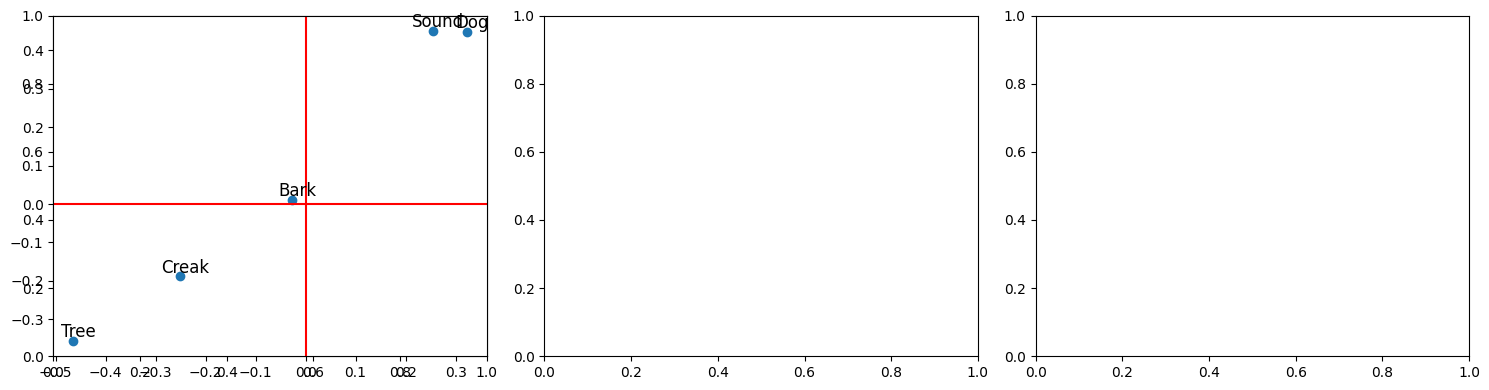

In [9]:
import numpy as np
from Utils import VectorUtils, ModelUtils, GraphUtils

def train(corpus, dimensions):
  vocab = ModelUtils.corpus_vocab(corpus)
  model = ModelUtils.train_model(corpus, dimensions)
  return model, vocab

model, vocab = train(corpora.corpus_bark, 2)
data = ModelUtils.prepare_word_plots(vocab, model, dimensions_to_plot=[0,1])

GraphUtils.render_multiple_graphs([data])


In [10]:
def train_and_prepare_graphs(corpus, dimensions):
    all_data = []
    model, vocab = train(corpus, dimensions)
    for i in range(0, dimensions):
        for j in range(i, dimensions):
            if i!=j:
                data = ModelUtils.prepare_word_plots(vocab, model, dimensions_to_plot=[i,j])
                data["title"] = f"{dimensions} dimensions: {i}, {j}"
                all_data.append(data)
    return model, vocab, all_data


Let's first see how three distinct features arrange themselves in 2 dimensions.

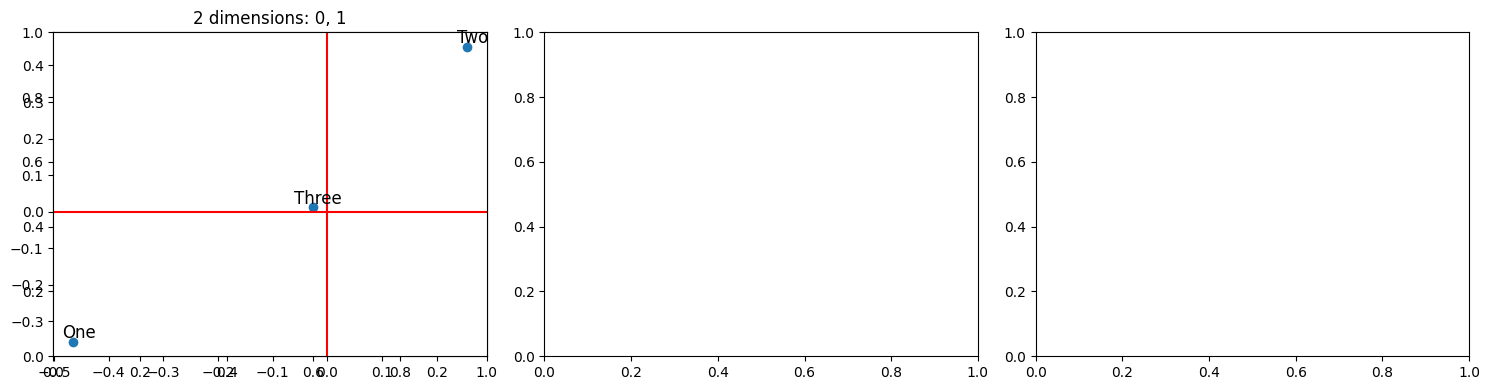

In [11]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_3, 2)
GraphUtils.render_multiple_graphs(data)

In [12]:
ModelUtils.print_word_differences(model, "One", "Two")
ModelUtils.print_word_differences(model, "One", "Three")
ModelUtils.print_word_differences(model, "Two", "Three")


 One - Two
Angle between:  156.9458
Cosine Similarity:  -0.92013484

 One - Three
Angle between:  61.209652
Cosine Similarity:  0.48160595

 Two - Three
Angle between:  95.73614
Cosine Similarity:  -0.099947445


Cosine similarity interpretation.
-  1 - Vectors are perfectly similar
-  0 - Vectors are orthogonal
- -1 - Vectors are completely opposite

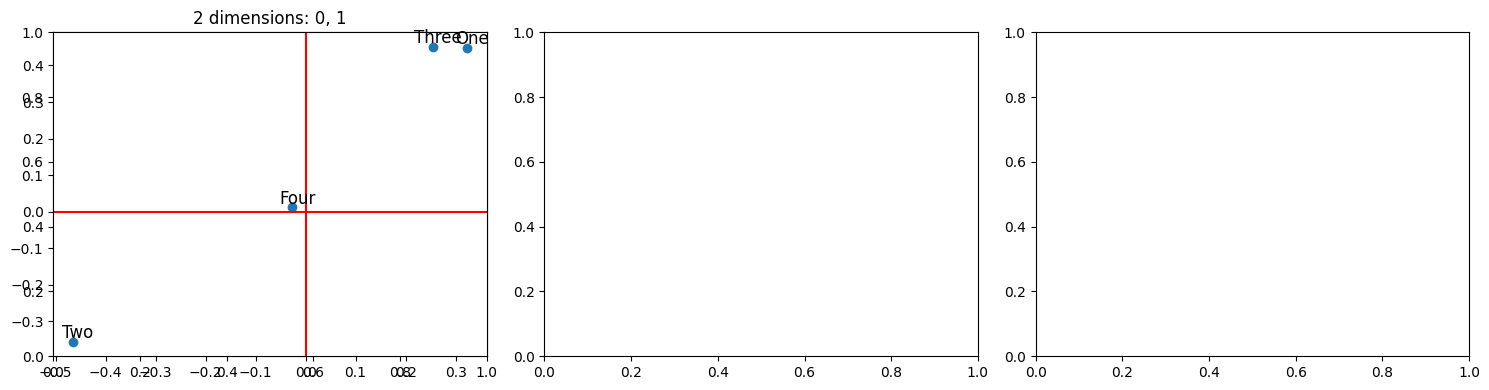

In [13]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_4, 2)
GraphUtils.render_multiple_graphs(data)

the graph above shows that 4 features cannot be represented in 2 dimensions without interference.

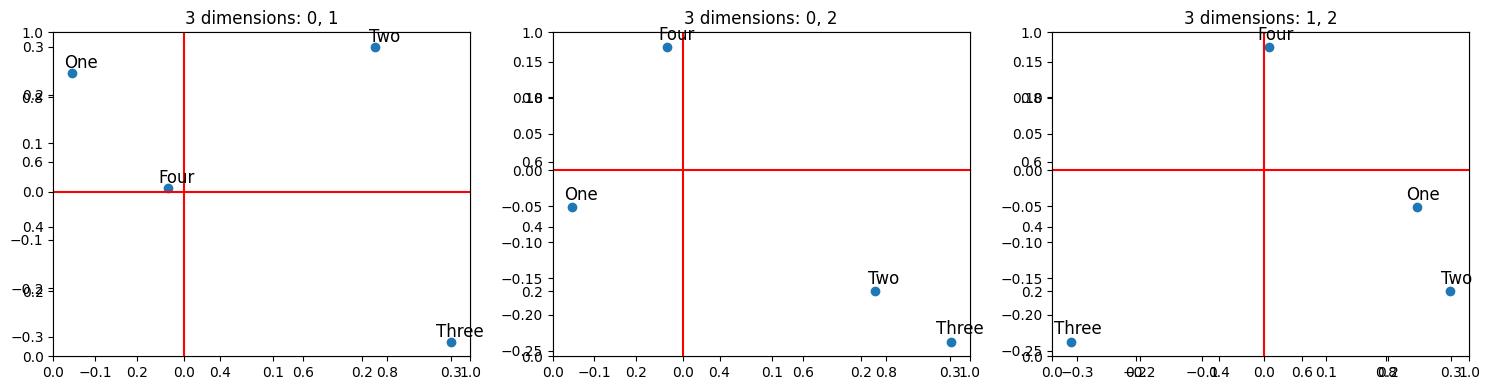

In [14]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_4, 3)
GraphUtils.render_multiple_graphs(data)

In [15]:
ModelUtils.print_word_differences(model, "One", "Two")
ModelUtils.print_word_differences(model, "One", "Three")
ModelUtils.print_word_differences(model, "One", "Four")
ModelUtils.print_word_differences(model, "Two", "Three")
ModelUtils.print_word_differences(model, "Two", "Four")
ModelUtils.print_word_differences(model, "Three", "Four")


 One - Two
Angle between:  60.987263
Cosine Similarity:  0.485004

 One - Three
Angle between:  137.40479
Cosine Similarity:  -0.73615366

 One - Four
Angle between:  95.38646
Cosine Similarity:  -0.09387321

 Two - Three
Angle between:  86.67392
Cosine Similarity:  0.05801837

 Two - Four
Angle between:  115.591
Cosine Similarity:  -0.4319441

 Three - Four
Angle between:  124.82607
Cosine Similarity:  -0.5710873


with an extra dimension, we can see that 
in the first graph, "one" and "four" have a similar angle from the origin and hence are similar using the cosine similarity metric.
in the second graph, "two" and "three" have a similar angle.
in the third graph, "one" and "two" have a similar angle.

features that are similar across a pair of dimensions are orthogonal in others.


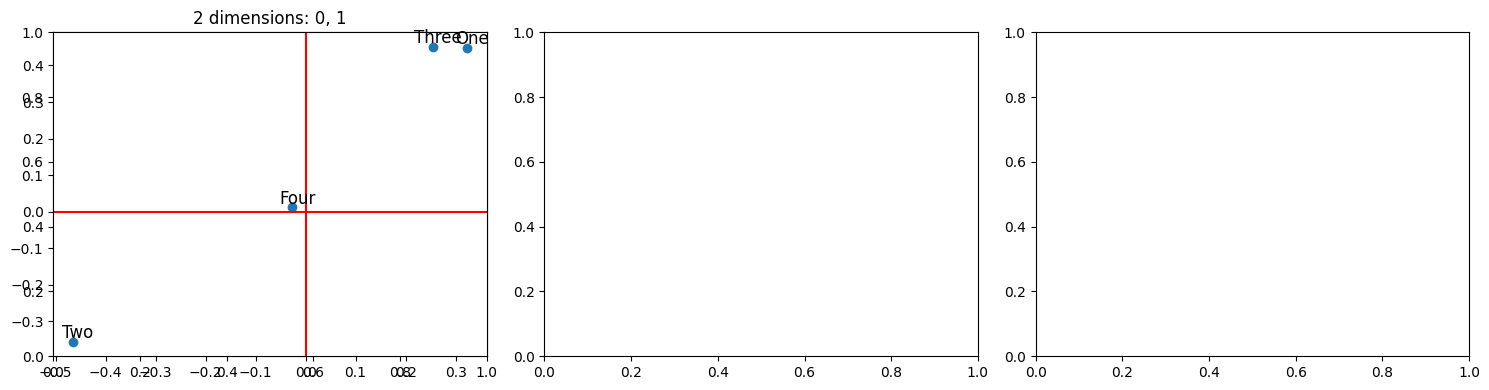

Average angle:  97.53752708435059


97.53752708435059

In [37]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_4, 2)
GraphUtils.render_multiple_graphs(data)
ModelUtils.average_angle(model, corpora.corpus_4)

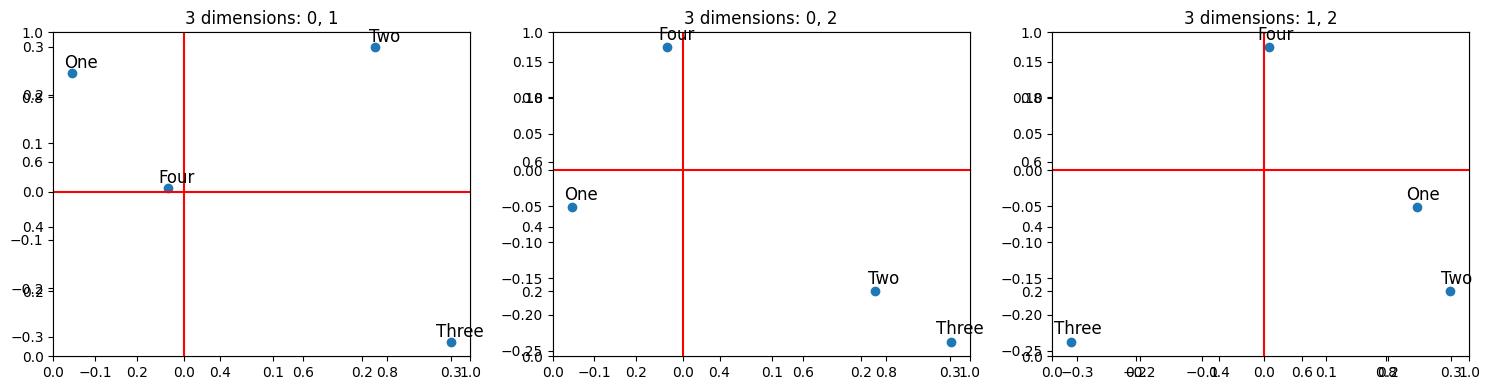

Average angle:  103.47825050354004


103.47825050354004

In [38]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_4, 3)
GraphUtils.render_multiple_graphs(data)
ModelUtils.average_angle(model, corpora.corpus_4)

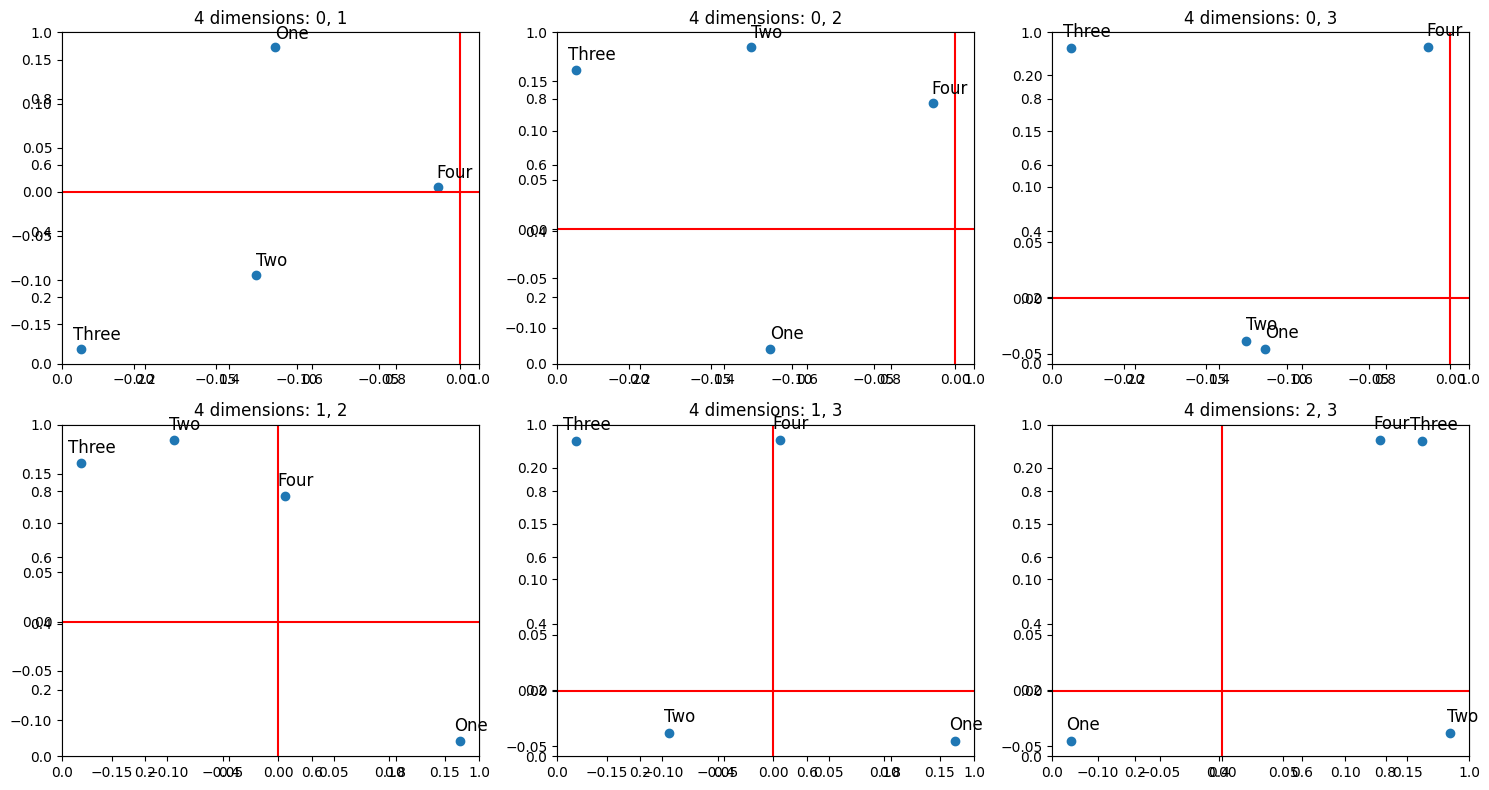

Average angle:  83.68910217285156


83.68910217285156

In [39]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_4, 4)
GraphUtils.render_multiple_graphs(data)
ModelUtils.average_angle(model, corpora.corpus_4)

I expected the average angle to get closer to 90 degrees, but it does not.

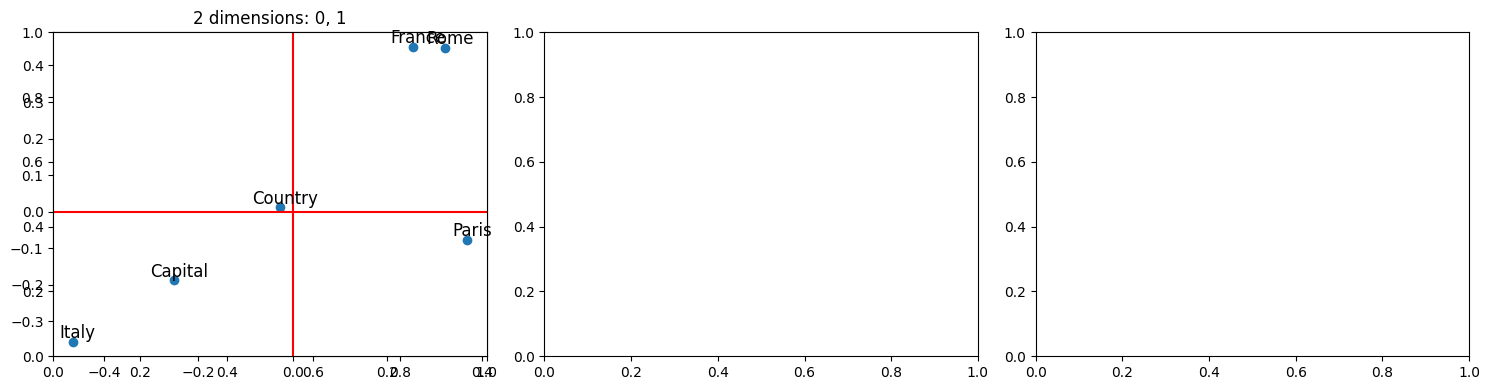

In [19]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_capital_small, 2)
GraphUtils.render_multiple_graphs(data)

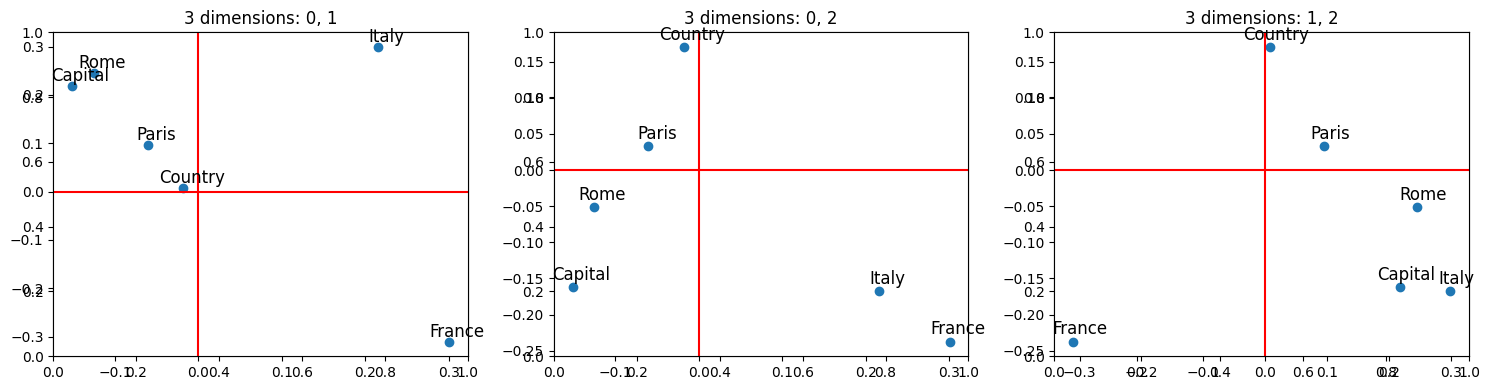

In [20]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_capital_small, 3)
GraphUtils.render_multiple_graphs(data)

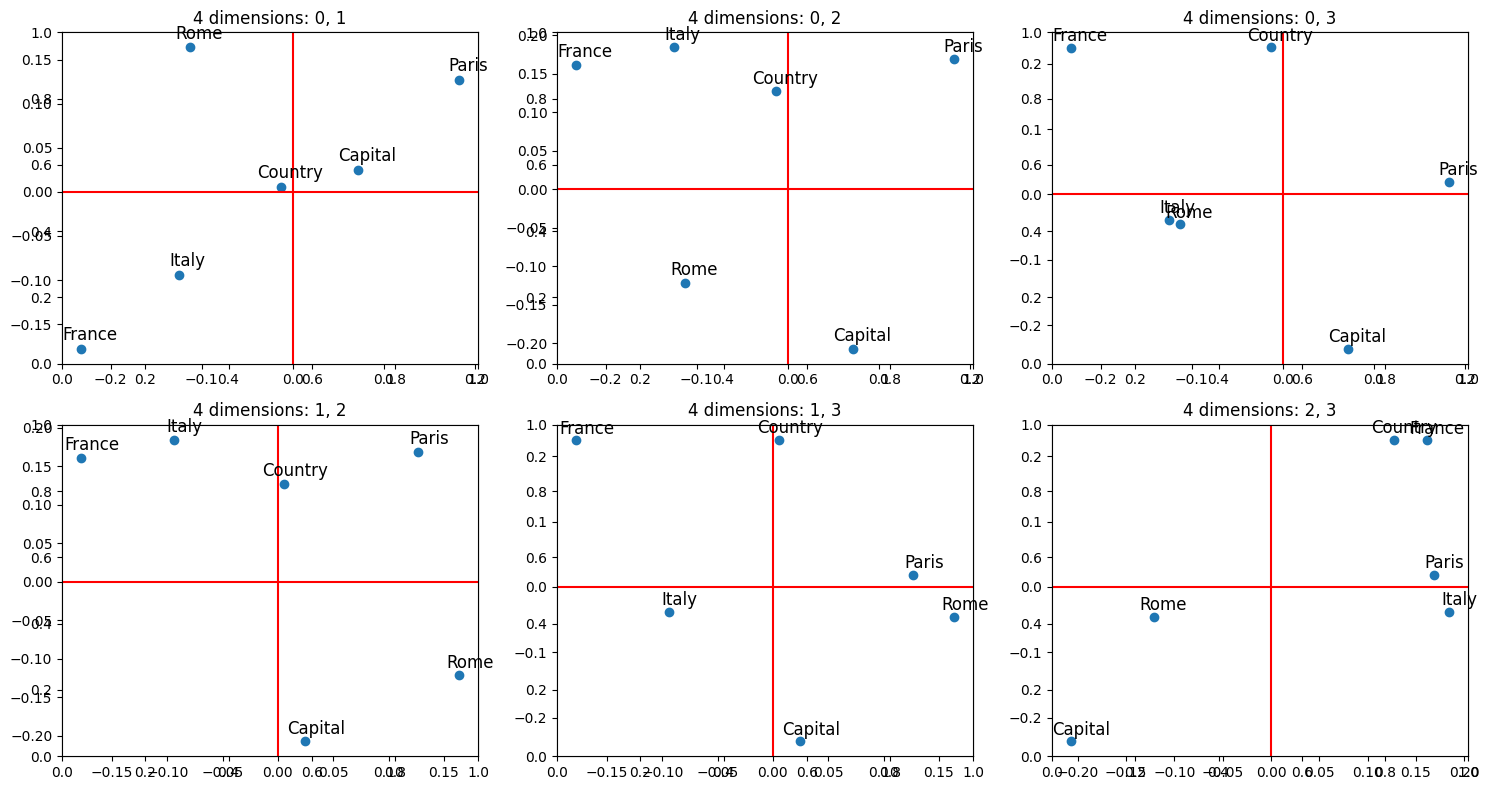

In [21]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_capital_small, 4)
GraphUtils.render_multiple_graphs(data)

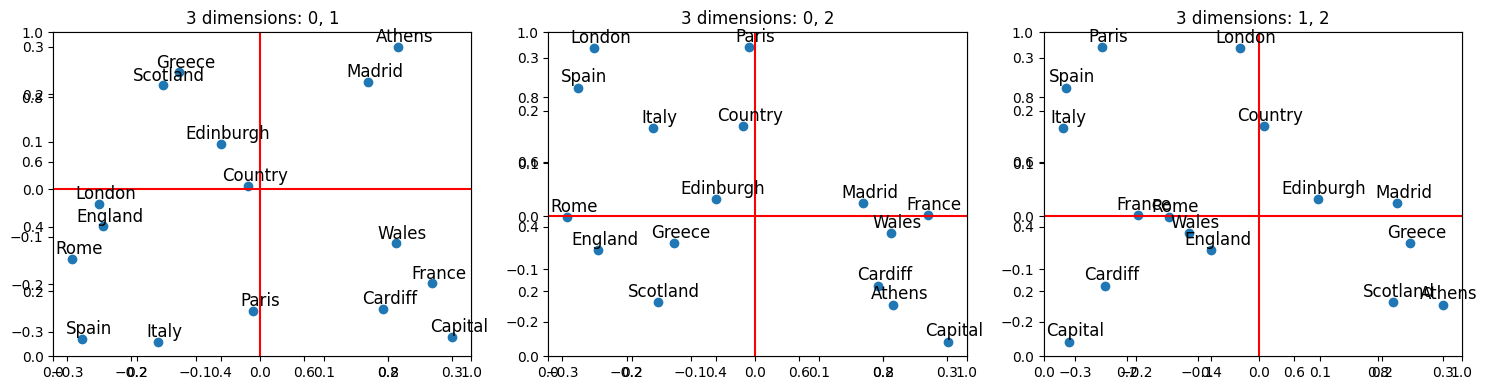

In [22]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_capital, 3)
GraphUtils.render_multiple_graphs(data)

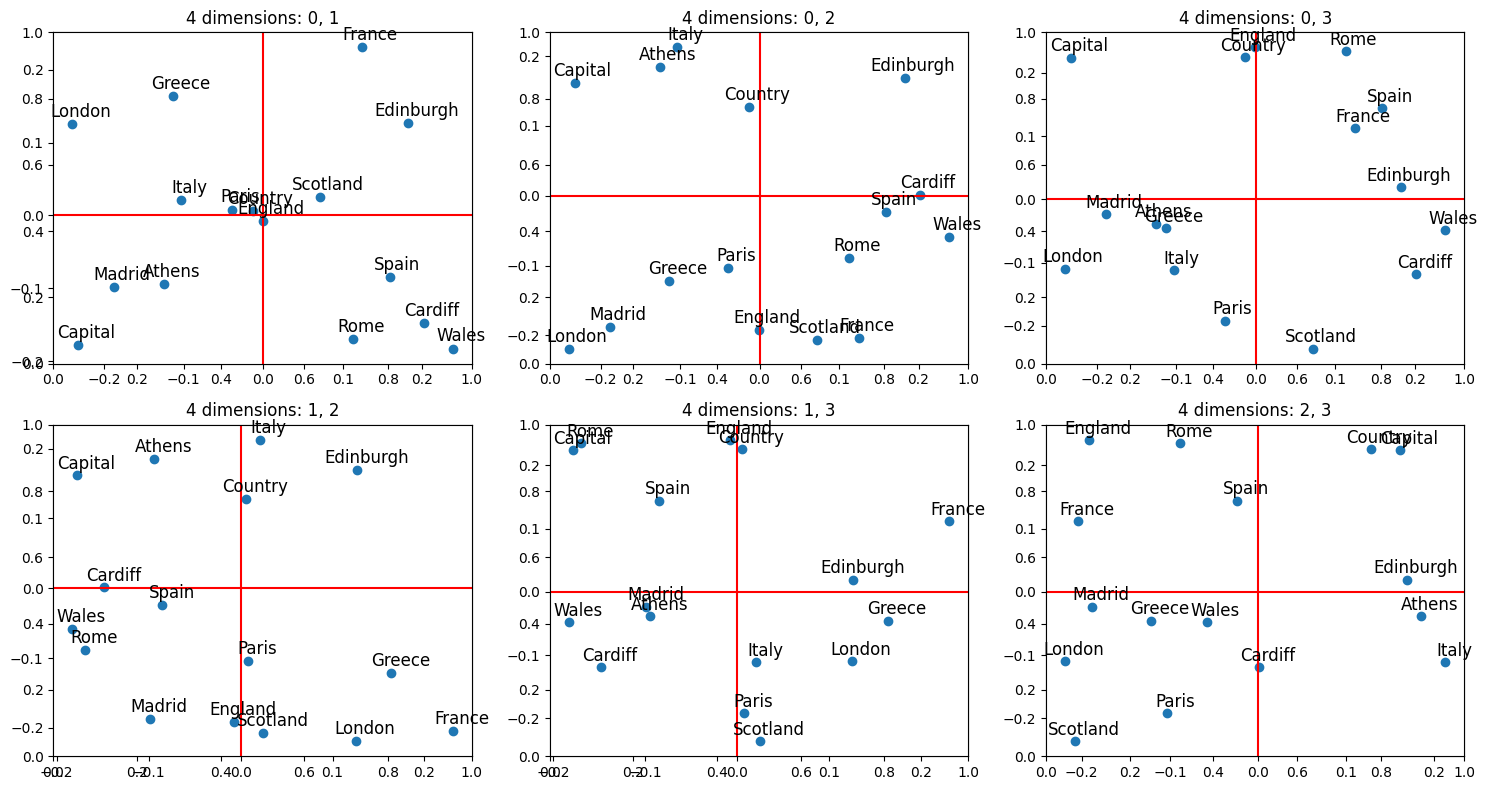

In [23]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_capital, 4)
GraphUtils.render_multiple_graphs(data)

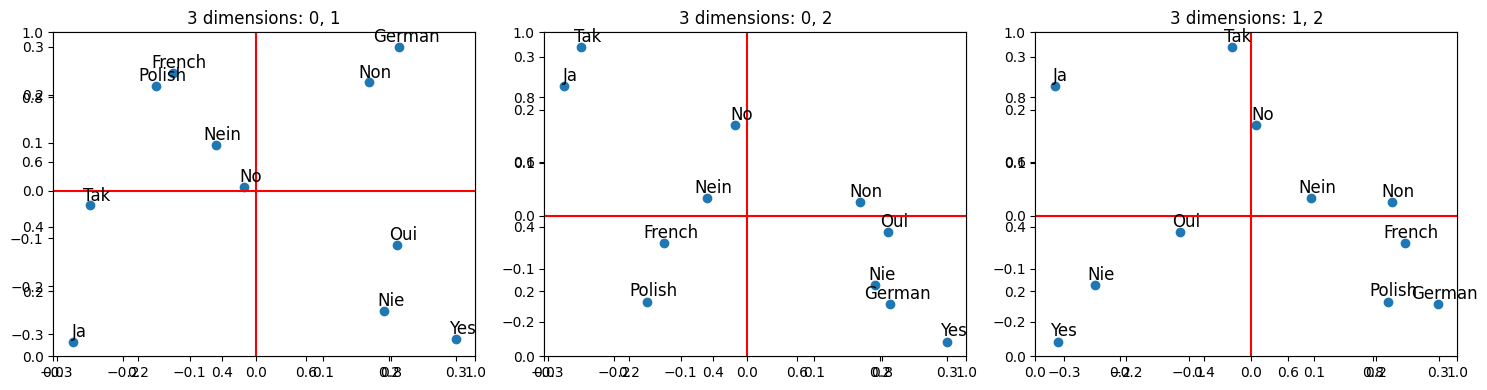

In [24]:
model, vocab, data = train_and_prepare_graphs(corpora.corpus_translate, 3)
GraphUtils.render_multiple_graphs(data)

In [25]:
ModelUtils.print_word_differences(model, "Tak", "Nie")
ModelUtils.print_word_differences(model, "Tak", "Yes")
ModelUtils.print_word_differences(model, "Ja", "Tak")


 Tak - Nie
Angle between:  126.23838
Cosine Similarity:  -0.5911461

 Tak - Yes
Angle between:  134.8526
Cosine Similarity:  -0.7052854

 Ja - Tak
Angle between:  37.333534
Cosine Similarity:  0.79511863


## Approach 2: Vectors between dissimilar words

Another approach to finding polysemantic relationships we took was to choose two seemingly unrelated words, compute the direction between their vectors and see what words are most similar to that resulting vector. The hope was that the words most similar to this vector would be similar across different models, indicating that dissimilar things are learned similarly.

In [26]:
def compare(models, pairs):
    print("\n")
    for model in models:
        for pair in pairs:
            v = model.wv[pair[0]] - model.wv[pair[1]]
            print(model.wv.most_similar(v))
    

compare([loaded_models["glove"], loaded_models["google_news"]], [("squirrel", "phone")])
compare([loaded_models["glove"], loaded_models["google_news"]], [("potato", "square")])
compare([loaded_models["glove"], loaded_models["google_news"]], [("poland", "yoga")])



[('nutkin', 0.7318739295005798), ('shrew', 0.724825918674469), ('grizzly', 0.6996013522148132), ('darner', 0.6786478757858276), ('rhinoceros', 0.6724755167961121), ('tarporley', 0.6670932769775391), ('lillies', 0.6641578078269958), ('louse', 0.6579570770263672), ('merda', 0.6428161859512329), ('e.n.d.', 0.6408583521842957)]
[('squirrel', 0.737991452217102), ('squirrels', 0.5947400331497192), ('fox', 0.4847506284713745), ('critters', 0.4617171287536621), ('gray_squirrel', 0.4523264169692993), ('red_tailed_hawk', 0.451271116733551), ('raccoon', 0.45003798604011536), ('monarch_caterpillars', 0.44542571902275085), ('bird', 0.44502314925193787), ('buzzard', 0.4445395767688751)]


[('nutsy', 0.6632758975028992), ('skippy', 0.6596720218658447), ('creamed', 0.6536835432052612), ('spaetzle', 0.6486536860466003), ('sawney', 0.6484820246696472), ('coleslaw', 0.6453075408935547), ('mashers', 0.6425214409828186), ('beet', 0.6403196454048157), ('vichyssoise', 0.6386362910270691), ('potato', 0.6355

These few tests do not seem promising for the idea. Often the similar word is very similar to the original word. 

e.g. the most similar vector to poland-yoga is still poland. This means that either:
1. yoga has a small magnitude
2. yoga does not interfere with poland

We want to find a pair of words that reliably produces an unintuitive word when subtracted from each other, but this method of finding them is a searching for a needle in a hay stack approach. How should we do it instead?

Perhaps I need to look at the vectors and see which dimensions change.

## Approach 3: Similar Words in Individual Dimensions

In Zoom In, individual neurons were visualised by generating an image that causes maximal activation of the neuron. For polysemantic neurons, this resulted in very different images for repeat runs.
With embeddings, we can find the most similar words to a vector with a single dimension set to its maximum while all other dimensions remain zero. We will call these words the "dimension words" for ease of reference.
If a dimension mostly responds to one kind of feature, i.e. is monosemantic, we would expect its dimension words to all be fairly similar.
If the dimension's words are all seemingly quite different, it indicates the dimension may be polysemantic.

We are interested to see if different models learn similar dimension words. And whether any dimension words occur across multiple dimensions in a model.

In [27]:
#model_sizes = [10,20,50,300,3,4,5]
model_sizes = [3, 40, 50, 60]

brown_models = {}
for size in model_sizes:
    model_name = f"brown_{size}"
    print(f"training {model_name}")
    loaded_models[model_name], vocab = train(corpus_brown, size)
    print(f"loaded {model_name}")


training brown_3
loaded brown_3
training brown_40
loaded brown_40
training brown_50
loaded brown_50
training brown_60
loaded brown_60


In [28]:
import pandas as pd

# Define the columns
columns = ['model', 'dimensions', 'dimension', 'similar words (similarity)']

# Example data
data = []

class ModelResults:
    def __init__(self, model, model_name) -> None:
        self.model_name = model_name
        self.model = model
        self.similar_words = []
    
    # returns the most similar words to the vector maxed out in one dimension
    def max_dimension_words(self, top=5):
        min_values, max_values = self.max_dimension(model)
        for i in range(self.model.vector_size):
            max_magnitude = max_values[i]
            max_vector = np.zeros(self.model.vector_size)
            max_vector[i] = max_magnitude
            similar_words =self.model.wv.most_similar(max_vector)[:top]
            self.similar_words.append(similar_words)
    
    def max_dimension(self, model):
        vectors = np.array(model.wv.vectors)
        max_values = np.max(vectors, axis=0)
        min_values = np.min(vectors, axis=0)
        return min_values, max_values

    
    def __str__(self) -> str:
        return f"{self.model_name} - {self.model} - {self.similar_words[0]} "

    def toRows(self):
        rows = []
        for i in range(self.model.vector_size):
            row = {
                "model": self.model_name,
                "dimensions": self.model,
                "dimension": i,
                "similar words (similarity)": self.similar_words[i]
            }
            rows.append(row)
        return rows
    
    def get_similar_flat(self):
        #flatten similar words list of lists
        flat_list = [
            x
            for xs in self.similar_words
            for x in xs
        ]
        return flat_list




mr = ModelResults(loaded_models["brown_3"], "model_brown_3")
mr.max_dimension_words()
#print(mr)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(mr.toRows(), columns=columns)
# Set display options
pd.set_option('display.max_colwidth', None)  # or a large integer like 1000
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Set a large width to accommodate all columns

# Display the DataFrame
print(df)



           model                                         dimensions  dimension                                                                                                                                             similar words (similarity)
0  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          0  [(maxim, 0.9717524647712708), (Snapped, 0.9690924882888794), (Compassionately, 0.9684276580810547), (gulley, 0.967505693435669), (upperclassmen, 0.9636027216911316)]
1  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          1              [(138, 0.9998629093170166), (Plants, 0.9997149109840393), (Galatians, 0.9988871812820435), (Innumerable, 0.9977067112922668), (Noon, 0.9969226121902466)]
2  model_brown_3  Word2Vec<vocab=56057, vector_size=3, alpha=0.025>          2                    [(hath, 0.9999998807907104), (Israel's, 0.9999938011169434), (pushers, 0.999993085861206), (Onsets, 0.999992847442627), (job-, 0.9999922513961792)]


In [29]:
results = []
model_results = []
for model_name, model in loaded_models.items():
    mr = ModelResults(model, model_name)
    mr.max_dimension_words()
    results = results + mr.toRows()
    model_results.append(mr)

df = pd.DataFrame(results, columns=columns)
# Display the DataFrame
df

,model,dimensions,dimension,similar words (similarity)
0,google_news,"model<vocab=?, vector_size=300>",0,"[(apocalyptic_prophesy, 0.25545403361320496), (Mythica, 0.24702315032482147), (sits_enthroned, 0.2460421621799469), (wcg, 0.2410862147808075), (Setup_Tool, 0.2381514608860016)]"
1,google_news,"model<vocab=?, vector_size=300>",1,"[(Shin_Dong, 0.2600080668926239), (Hyon, 0.2565069794654846), (Millett, 0.25122904777526855), (Kwon, 0.24837884306907654), (Achar, 0.24678219854831696)]"
2,google_news,"model<vocab=?, vector_size=300>",2,"[(CAS_arbitrators, 0.24584147334098816), (Mark_Kornblau_spokesman, 0.2425474226474762), (particle_accelerator, 0.23843829333782196), (Mithi_Virdi, 0.23499388992786407), (atomic_arsenals, 0.23447048664093018)]"
3,google_news,"model<vocab=?, vector_size=300>",3,"[(Ginsburgs, 0.28120988607406616), (Dinty_Moore, 0.2802680432796478), (jelly_sandwiches, 0.2788439691066742), (heartier_appetites, 0.2741965055465698), (they'd, 0.2711051106452942)]"
4,google_news,"model<vocab=?, vector_size=300>",4,"[(Exemplary_Teaching, 0.2654290795326233), (Terrell_Vinson, 0.26017850637435913), (Onyekwe, 0.2501116991043091), (pivot_Anthony_Calvillo, 0.2497139871120453), (Brent_Shepheard_Shawnigan_Lake, 0.24609020352363586)]"
...,...,...,...,...
498,brown_60,"Word2Vec<vocab=56057, vector_size=60, alpha=0.025>",55,"[(Mesta, 0.3630768358707428), (Attacks, 0.3582983911037445), (Horton, 0.35773760080337524), (Prado, 0.3518527150154114), (Possible, 0.34969669580459595)]"
499,brown_60,"Word2Vec<vocab=56057, vector_size=60, alpha=0.025>",56,"[(later, 0.3171980381011963), (be, 0.31493380665779114), (&, 0.3068329989910126), (gunk, 0.3038715720176697), (General, 0.30341577529907227)]"
500,brown_60,"Word2Vec<vocab=56057, vector_size=60, alpha=0.025>",57,"[(toward, 0.31254205107688904), (outside, 0.3065120279788971), (meet, 0.30375242233276367), (two, 0.30071112513542175), (forward, 0.2862092852592468)]"
501,brown_60,"Word2Vec<vocab=56057, vector_size=60, alpha=0.025>",58,"[(from, 0.2885587811470032), (white, 0.2874172627925873), (become, 0.2869933545589447), (Decries, 0.28627142310142517), (braved, 0.28478795289993286)]"


In [30]:

# Export DataFrame to Excel
df.to_excel('output.xlsx', index=False, engine='openpyxl')

print("DataFrame exported to Excel successfully.")


DataFrame exported to Excel successfully.


Identifying words that occur across different dimensions:

In [31]:
word_sets = []
for result in model_results:
    print(f"\n{result.model_name}")
    model_words = [ word for word, _ in result.get_similar_flat()]
    #print(model_words)
    model_words_set = set(model_words)
    duplicate_words = set([x for x in model_words if model_words.count(x) > 1])
    print(f"duplicate words: {len(duplicate_words)} - {duplicate_words}")
    word_sets.append(model_words_set)



google_news
duplicate words: 2 - {'grubber', 'IBD_TIPP_Presidential'}

glove
duplicate words: 0 - set()

brown_3
duplicate words: 0 - set()

brown_40
duplicate words: 29 - {'Sulfaquinoxaline', 'Secretion', 'not', 'Undergraduates', 'Molding', 'Advantages', ';', 'His', 'Pugh', 'Backbends', 'Ranking', 'along', 'Trim-your-own-franks', 'Seafood', 'Achieving', 'In', 'Warmly', 'Meats', 'for', 'ever', 'Repayment', 'are', 'Norms', 'Movies', 'Thirty-four', 'Subjects', 'Somersaults', 'Months', 'Vacations'}

brown_50
duplicate words: 23 - {'Sulfaquinoxaline', '?', 'Undergraduates', 'period', 'Proprietorship', 'Advantages', 'Mrs.', 'Backbends', 'Subsystems', 'Trim-your-own-franks', 'Achieving', 'no', 'Nightclubs', 'Meats', 'Repayment', 'Thirty-six', 'Norms', 'Boonton', 'Astronomy', 'their', 'Plants', 'Movies', 'Status-roles'}

brown_60
duplicate words: 48 - {"can't", 'said', 'Secretion', 'Requirements', 'white', 'Jr.', '7-5', 'For', 'Proprietorship', 'As', 'Molding', 'Advantages', '!', 'Pugh', 'hu

Identifying dimension words that occur across across models

In [32]:
print("Lets see what words the models have in common in the individual dimensions")
for i in range(len(model_results)):
    for j in range(i, len(model_results)):
        if(i!=j):
            common_strings = word_sets[i].intersection(word_sets[j])
            print(f"\n{model_results[i].model_name} and {model_results[j].model_name} common: {len(common_strings)} -", common_strings)


Lets see what words the models have in common in the individual dimensions

google_news and glove common: 0 - set()

google_news and brown_3 common: 0 - set()

google_news and brown_40 common: 2 - {'also', 'until'}

google_news and brown_50 common: 0 - set()

google_news and brown_60 common: 0 - set()

glove and brown_3 common: 0 - set()

glove and brown_40 common: 0 - set()

glove and brown_50 common: 1 - {'with'}

glove and brown_60 common: 0 - set()

brown_3 and brown_40 common: 0 - set()

brown_3 and brown_50 common: 1 - {'Plants'}

brown_3 and brown_60 common: 1 - {'Plants'}

brown_40 and brown_50 common: 56 - {'does', 'Sulfaquinoxaline', 'our', 'Secretion', 'own', 'Requirements', '?', 'Undergraduates', 'during', 'period', 'Proprietorship', 'available', 'due', 'Advantages', 'four', 'between', 'Backbends', 'Trim-your-own-franks', 'be', 'Syllabification', 'or', 'Achieving', 'been', 'an', 'Impatiently', 'Goddammit', 'In', 'Of', 'Nightclubs', 'would', 'per', 'whose', 'will', 'Meats', 